In [24]:
# Import all the required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sqlite3 import Error
import sqlite3
import pickle
import nltk
%matplotlib inline

# SciKit learn Models:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV 

# SciKit learn Metrics:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import f1_score, make_scorer
f1scoring = {'f1': make_scorer(f1_score , average='weighted')}

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, LSTM

from keras.layers import Conv1D, Flatten, MaxPooling1D
from keras.preprocessing import text, sequence
#import wandb
#from wandb.keras import WandbCallback

import pickle
from flask import Flask, request, render_template

In [2]:
# Import the Independent Test data: final(2409).csv
test = pd.read_csv('final2409.csv')

X_itest = test['OBS(mist-free)-2']
y_itest = test['Category-encoded-2']

test.head()

,Unnamed: 0,OBSERVATION,OBS(mist-free),OBS(mist-free)-2,Category(corrected),Category(old),Category-encoded-2,Category-encoded
0,5209,Two workers without fire blankets grinding wor...,two worker without fire blanket grinding work ...,two worker without fire blanket grinding work ...,UC,UC,2,2
1,11954,All electrical & mechanical equipment tagged w...,electrical mechanical equipment tagged blue co...,electrical mechanical equipment tagged blue co...,GO,GO,0,0
2,11027,Safe excavation work.,safe excavation work,safe excavation work,GO,GO,0,0
3,10019,Very good housekeeping,good housekeeping,good housekeeping,GO,GO,0,0
4,2026,Welder assistant was sleeping while his partne...,welder assistant sleeping partner welding beside,welder assistant sleeping partner welding beside,UA,UA,1,1


In [3]:
# Import Train and Test data
train_data = pd.read_csv('train_1.csv')
test_data = pd.read_csv('d_1.csv')

In [4]:
train_data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,OBSERVATION,OBS(mist-free),OBS(mist-free)-2,Category(corrected),Category(old),Category-encoded,Category-encoded-2
0,0,1709,11471,A TOOL CAN USED BY THE WELDING GROUP WAS INSID...,tool used welding group inside approved liftin...,tool used welding group inside approved liftin...,GO,GO,0,0
1,1,403,1406,In pipe rack area no proper barricate.,pipe rack area proper barricade,pipe rack area no proper barricade,UC,UC,2,2
2,2,6911,8801,"Brown Field, Along street - 7 of refinery area...",brown field along street refinery area observe...,brown field along street refinery area observe...,UC,UC,2,2
3,3,7177,5709,Unproper access way due to pipe materials.,unproper access way due pipe material,unproper access way due pipe material,UC,UC,2,2
4,4,1849,10448,During the binding of GRE pipe & spools all bo...,binding gre pipe spool border using rubber glo...,during binding gre pipe spool border using rub...,GO,GO,0,0


In [5]:
test_data.head()

,Unnamed: 0,Unnamed: 0.1,OBSERVATION,OBS(mist-free),OBS(mist-free)-2,Category(corrected),Category(old),Category-encoded,Category-encoded-2
0,2751,4178,Rubbish & necessary materials are scatterd on ...,rubbish necessary material scattered west sh c...,rubbish necessary material scattered west sh c...,UC,UC,2,2
1,4383,2740,Observed that scaffolding materials were mixed...,observed scaffolding material mixed scattered,observed scaffolding material mixed scattered,UC,UC,2,2
2,4494,7897,A few guys are not holding safety helmet durin...,guy not holding safety helmet tbm,guy not holding safety helmet during tbm,UC,UC,2,2
3,9464,3564,Piping spool stand w/out proper support,piping spool stand w proper support,piping spool stand w proper support,UC,UC,2,2
4,8779,7166,EQUIPMENT FOUND WITH OUT COLOR CODING IN WORK ...,equipment found color coding work site,equipment found color coding work site,UC,UC,2,2


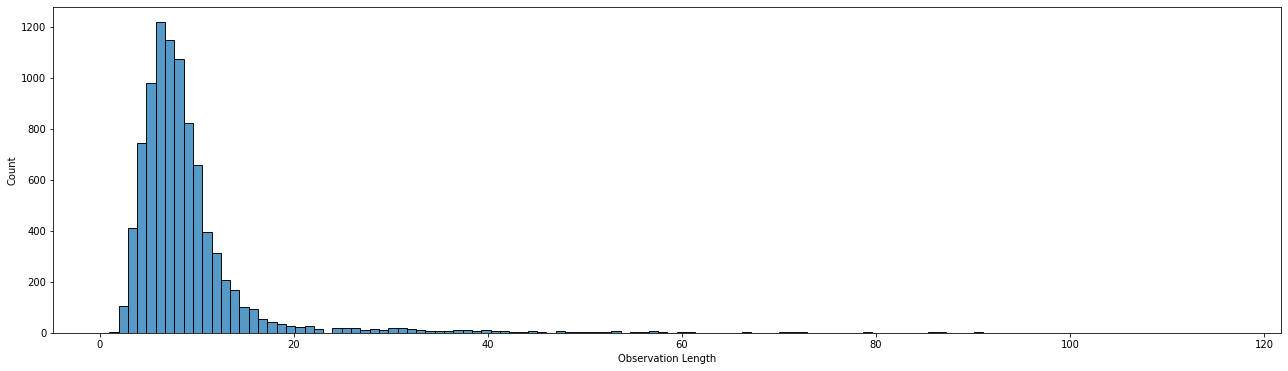

In [ ]:
#words per observation
plt.figure(figsize = (22,6))
WordsPerReview = train_data['OBS(mist-free)-2'].apply(lambda x: len(x.split(' ')))

sns.histplot(WordsPerReview,bins = 120)

plt.xlabel('Observation Length')
plt.show()

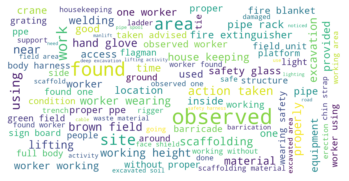

In [ ]:
txt = ' '.join(review for review in train_data['OBS(mist-free)-2'])

wordcloud = WordCloud(
            background_color = 'white',
            max_font_size = 100,
            max_words = 100,
            width = 1600,
            height = 800
            ).generate(txt)


plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

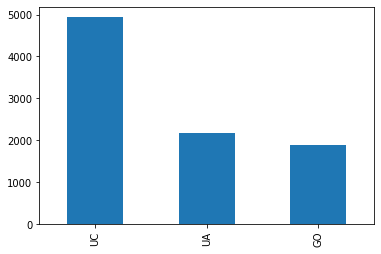

In [ ]:
train_data['Category(corrected)'].value_counts().plot.bar(ylim=0)
plt.show()

## 1) Logistic Regression (LR) Model

In [20]:
def LR(tr, ts, rdf, n):
    # Import Train and Test data
    train_data = pd.read_csv(tr)
    test_data = pd.read_csv(ts)
    
    # TF-IDF Vectorizer for 'OBS(mist-free)-2' text column in Train data
    vectorizer = TfidfVectorizer(min_df= 2, sublinear_tf=True, norm='l2', ngram_range=(1, 3))
    final_features = vectorizer.fit_transform(train_data['OBS(mist-free)-2']).toarray()
    print('TF-IDF Vectorization-')
    print('Train data dimensions:', final_features.shape)
    print()
    
    # Train data-
    X_train = train_data['OBS(mist-free)-2']
    y_train = train_data['Category-encoded-2']
    
    # Test data-
    X_test = test_data['OBS(mist-free)-2']
    y_test = test_data['Category-encoded-2']
    
    # Logistic Regression Pipeline
    LRPipeline = Pipeline([('vect', vectorizer),
                     ('clf', LogisticRegression(C= 10, class_weight= None, dual= False, fit_intercept= True,
                              intercept_scaling= 1, l1_ratio= None, multi_class= 'auto',
                              n_jobs= None, penalty= 'l2', random_state=6, solver='liblinear', max_iter=1000))])

    model = LRPipeline.fit(X_train, y_train)
    y_test = np.array(y_test)

    # Final Results on Train, Test & Independent Test datasets
    print('The Report for Logistic Regression Model is:- \n')
    
    # Train data
    print('1) Training Data:')
    matrix = plot_confusion_matrix(model, X_train, y_train, values_format='d')
    matrix.ax_.set_title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.gcf().axes[0].tick_params(color='black')
    plt.gcf().set_size_inches(4,3)
    plt.show()
    print(classification_report(y_train, model.predict(X_train)))

    # Test data
    print('2) Test Data:')
    matrix = plot_confusion_matrix(model, X_test, y_test, values_format='d')
    matrix.ax_.set_title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.gcf().axes[0].tick_params(color='black')
    plt.gcf().set_size_inches(4,3)
    plt.show()
    print(classification_report(y_test, model.predict(X_test)))

    # Independent Test data
    print('3) Independent Test Data:')
    matrix = plot_confusion_matrix(model, X_itest, y_itest, values_format='d')
    matrix.ax_.set_title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.gcf().axes[0].tick_params(color='black')
    plt.gcf().set_size_inches(4,3)
    plt.show()
    print(classification_report(y_itest,model.predict(X_itest)))

    # Accuracy scores
    print('Accuracy Scores for Logistic Regression-')
    print('1) Training Data        :', accuracy_score(y_train, model.predict(X_train))*100)
    print('2) Test Data            :', accuracy_score(y_test, model.predict(X_test))*100)
    print('3) Independent Test Data:', accuracy_score(y_itest, model.predict(X_itest))*100)

    # F1 scores
    print('\nF1 Scores for Logistic Regression-')
    print('1) Training Data        :', f1_score(y_train, model.predict(X_train), average="weighted") * 100)
    print('2) Test Data            :', f1_score(y_test, model.predict(X_test), average="weighted") * 100)
    print('3) Independent Test Data:', f1_score(y_itest, model.predict(X_itest), average="weighted") * 100)

    # Export Results to DataFrame
    curr = 'Split '+str(n)

    rdf.loc[curr, ('Training Data', 'GO')] = f1_score(y_train, model.predict(X_train), average=None)[0]
    rdf.loc[curr, ('Training Data', 'UA')] = f1_score(y_train, model.predict(X_train), average=None)[1]
    rdf.loc[curr, ('Training Data', 'UC')] = f1_score(y_train, model.predict(X_train), average=None)[2]
    rdf.loc[curr, ('Training Data', 'Total F1')] = f1_score(y_train, model.predict(X_train), average="weighted")
    rdf.loc[curr, ('Training Data', 'Accuracy')] = accuracy_score(y_train, model.predict(X_train))

    rdf.loc[curr, ('Testing Data', 'GO')] = f1_score(y_test, model.predict(X_test), average=None)[0]
    rdf.loc[curr, ('Testing Data', 'UA')] = f1_score(y_test, model.predict(X_test), average=None)[1]
    rdf.loc[curr, ('Testing Data', 'UC')] = f1_score(y_test, model.predict(X_test), average=None)[2]
    rdf.loc[curr, ('Testing Data', 'Total F1')] = f1_score(y_test, model.predict(X_test), average="weighted")
    rdf.loc[curr, ('Testing Data', 'Accuracy')] = accuracy_score(y_test, model.predict(X_test))

    rdf.loc[curr, ('Independent Test Data', 'GO')] = f1_score(y_itest, model.predict(X_itest), average=None)[0]
    rdf.loc[curr, ('Independent Test Data', 'UA')] = f1_score(y_itest, model.predict(X_itest), average=None)[1]
    rdf.loc[curr, ('Independent Test Data', 'UC')] = f1_score(y_itest, model.predict(X_itest), average=None)[2]
    rdf.loc[curr, ('Independent Test Data', 'Total F1')] = f1_score(y_itest, model.predict(X_itest), average="weighted")
    rdf.loc[curr, ('Independent Test Data', 'Accuracy')] = accuracy_score(y_itest, model.predict(X_itest))

In [21]:
# Final Output DataFrame
# Index Levels
outside = ['Training Data', 'Training Data', 'Training Data', 'Training Data', 'Training Data', 
           'Testing Data', 'Testing Data', 'Testing Data', 'Testing Data', 'Testing Data', 
           'Independent Test Data', 'Independent Test Data', 'Independent Test Data', 'Independent Test Data', 'Independent Test Data']
inside = ['GO', 'UA', 'UC', 'Total F1', 'Accuracy', 'GO', 'UA', 'UC', 'Total F1', 'Accuracy', 'GO', 'UA', 'UC', 'Total F1', 'Accuracy']
hier_index = list(zip(outside,inside))

cols = ['Split 1', 'Split 2', 'Split 3', 'Split 4', 'Split 5', 'Split 6', 'Split 7', 'Split 8', 'Split 9', 'Split 10']

# Forming the MultiIndex first
hier_index = pd.MultiIndex.from_tuples(hier_index)

rdf = pd.DataFrame(np.random.randn(10, 15), index=cols,columns=hier_index)


************************** Logistic Regression on train_1.csv & d_1.csv **************************
TF-IDF Vectorization-
Train data dimensions: (9000, 19411)

The Report for Logistic Regression Model is:- 

1) Training Data:


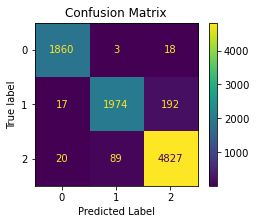

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1881
           1       0.96      0.90      0.93      2183
           2       0.96      0.98      0.97      4936

    accuracy                           0.96      9000
   macro avg       0.96      0.96      0.96      9000
weighted avg       0.96      0.96      0.96      9000

2) Test Data:


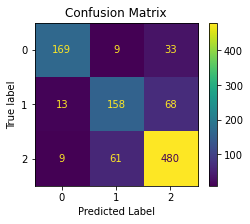

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       211
           1       0.69      0.66      0.68       239
           2       0.83      0.87      0.85       550

    accuracy                           0.81      1000
   macro avg       0.80      0.78      0.79      1000
weighted avg       0.81      0.81      0.81      1000

3) Independent Test Data:


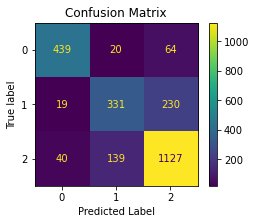

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       523
           1       0.68      0.57      0.62       580
           2       0.79      0.86      0.83      1306

    accuracy                           0.79      2409
   macro avg       0.78      0.76      0.77      2409
weighted avg       0.78      0.79      0.78      2409

Accuracy Scores for Logistic Regression-
1) Training Data        : 96.23333333333333
2) Test Data            : 80.7
3) Independent Test Data: 78.74636778746368

F1 Scores for Logistic Regression-
1) Training Data        : 96.20659973422742
2) Test Data            : 80.59730889342585
3) Independent Test Data: 78.37541722413647


************************** Logistic Regression on train_2.csv & d_2.csv **************************
TF-IDF Vectorization-
Train data dimensions: (9000, 19343)

The Report for Logistic Regression Model is:- 

1) Training Data:


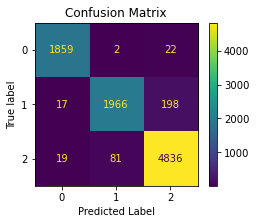

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1883
           1       0.96      0.90      0.93      2181
           2       0.96      0.98      0.97      4936

    accuracy                           0.96      9000
   macro avg       0.97      0.96      0.96      9000
weighted avg       0.96      0.96      0.96      9000

2) Test Data:


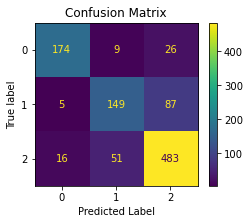

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       209
           1       0.71      0.62      0.66       241
           2       0.81      0.88      0.84       550

    accuracy                           0.81      1000
   macro avg       0.81      0.78      0.79      1000
weighted avg       0.80      0.81      0.80      1000

3) Independent Test Data:


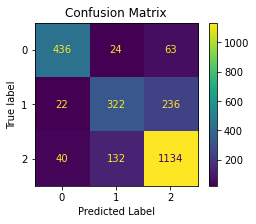

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       523
           1       0.67      0.56      0.61       580
           2       0.79      0.87      0.83      1306

    accuracy                           0.79      2409
   macro avg       0.78      0.75      0.76      2409
weighted avg       0.78      0.79      0.78      2409

Accuracy Scores for Logistic Regression-
1) Training Data        : 96.23333333333333
2) Test Data            : 80.60000000000001
3) Independent Test Data: 78.53881278538812

F1 Scores for Logistic Regression-
1) Training Data        : 96.2040797816906
2) Test Data            : 80.32378239708787
3) Independent Test Data: 78.08795277952244


************************** Logistic Regression on train_3.csv & d_3.csv **************************
TF-IDF Vectorization-
Train data dimensions: (9000, 19105)

The Report for Logistic Regression Model is:- 

1) Training Data:


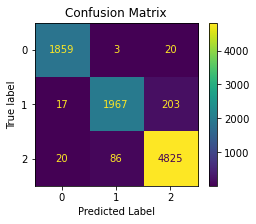

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1882
           1       0.96      0.90      0.93      2187
           2       0.96      0.98      0.97      4931

    accuracy                           0.96      9000
   macro avg       0.96      0.96      0.96      9000
weighted avg       0.96      0.96      0.96      9000

2) Test Data:


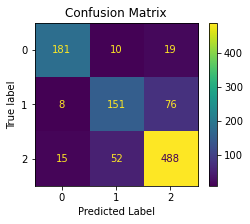

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       210
           1       0.71      0.64      0.67       235
           2       0.84      0.88      0.86       555

    accuracy                           0.82      1000
   macro avg       0.81      0.79      0.80      1000
weighted avg       0.82      0.82      0.82      1000

3) Independent Test Data:


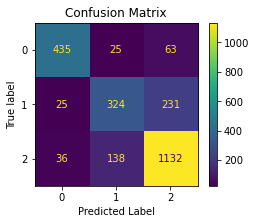

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       523
           1       0.67      0.56      0.61       580
           2       0.79      0.87      0.83      1306

    accuracy                           0.78      2409
   macro avg       0.78      0.75      0.76      2409
weighted avg       0.78      0.78      0.78      2409

Accuracy Scores for Logistic Regression-
1) Training Data        : 96.12222222222222
2) Test Data            : 82.0
3) Independent Test Data: 78.49730178497302

F1 Scores for Logistic Regression-
1) Training Data        : 96.09188642539614
2) Test Data            : 81.80313371002484
3) Independent Test Data: 78.08402305486882


************************** Logistic Regression on train_4.csv & d_4.csv **************************
TF-IDF Vectorization-
Train data dimensions: (9000, 19329)

The Report for Logistic Regression Model is:- 

1) Training Data:


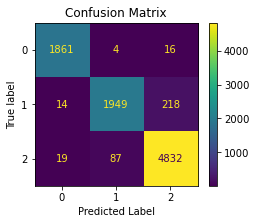

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1881
           1       0.96      0.89      0.92      2181
           2       0.95      0.98      0.97      4938

    accuracy                           0.96      9000
   macro avg       0.96      0.95      0.96      9000
weighted avg       0.96      0.96      0.96      9000

2) Test Data:


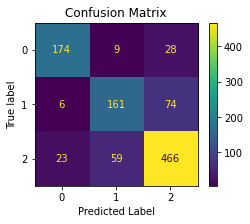

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       211
           1       0.70      0.67      0.69       241
           2       0.82      0.85      0.84       548

    accuracy                           0.80      1000
   macro avg       0.79      0.78      0.79      1000
weighted avg       0.80      0.80      0.80      1000

3) Independent Test Data:


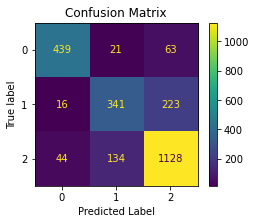

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       523
           1       0.69      0.59      0.63       580
           2       0.80      0.86      0.83      1306

    accuracy                           0.79      2409
   macro avg       0.79      0.76      0.77      2409
weighted avg       0.79      0.79      0.79      2409

Accuracy Scores for Logistic Regression-
1) Training Data        : 96.02222222222223
2) Test Data            : 80.10000000000001
3) Independent Test Data: 79.20298879202988

F1 Scores for Logistic Regression-
1) Training Data        : 95.98746196189066
2) Test Data            : 80.01217026581654
3) Independent Test Data: 78.87678622670869


************************** Logistic Regression on train_5.csv & d_5.csv **************************
TF-IDF Vectorization-
Train data dimensions: (9000, 19315)

The Report for Logistic Regression Model is:- 

1) Training Data:


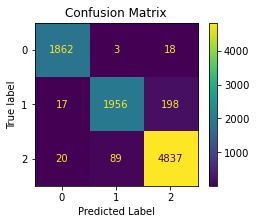

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1883
           1       0.96      0.90      0.93      2171
           2       0.96      0.98      0.97      4946

    accuracy                           0.96      9000
   macro avg       0.96      0.96      0.96      9000
weighted avg       0.96      0.96      0.96      9000

2) Test Data:


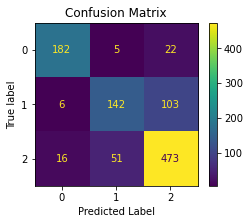

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       209
           1       0.72      0.57      0.63       251
           2       0.79      0.88      0.83       540

    accuracy                           0.80      1000
   macro avg       0.80      0.77      0.78      1000
weighted avg       0.79      0.80      0.79      1000

3) Independent Test Data:


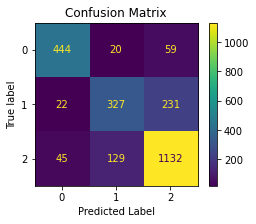

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       523
           1       0.69      0.56      0.62       580
           2       0.80      0.87      0.83      1306

    accuracy                           0.79      2409
   macro avg       0.78      0.76      0.77      2409
weighted avg       0.79      0.79      0.79      2409

Accuracy Scores for Logistic Regression-
1) Training Data        : 96.16666666666667
2) Test Data            : 79.7
3) Independent Test Data: 78.99543378995433

F1 Scores for Logistic Regression-
1) Training Data        : 96.1376277523975
2) Test Data            : 79.18578768569411
3) Independent Test Data: 78.5480470210049


************************** Logistic Regression on train_6.csv & d_6.csv **************************
TF-IDF Vectorization-
Train data dimensions: (9000, 19142)

The Report for Logistic Regression Model is:- 

1) Training Data:


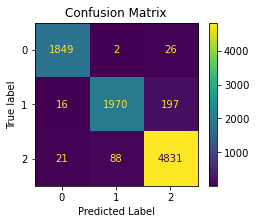

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1877
           1       0.96      0.90      0.93      2183
           2       0.96      0.98      0.97      4940

    accuracy                           0.96      9000
   macro avg       0.96      0.96      0.96      9000
weighted avg       0.96      0.96      0.96      9000

2) Test Data:


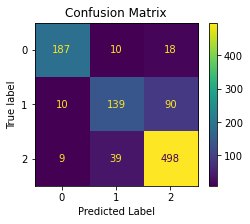

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       215
           1       0.74      0.58      0.65       239
           2       0.82      0.91      0.86       546

    accuracy                           0.82      1000
   macro avg       0.82      0.79      0.80      1000
weighted avg       0.82      0.82      0.82      1000

3) Independent Test Data:


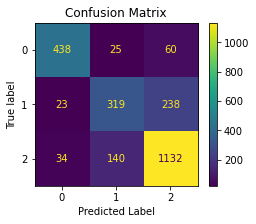

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       523
           1       0.66      0.55      0.60       580
           2       0.79      0.87      0.83      1306

    accuracy                           0.78      2409
   macro avg       0.78      0.75      0.76      2409
weighted avg       0.78      0.78      0.78      2409

Accuracy Scores for Logistic Regression-
1) Training Data        : 96.11111111111111
2) Test Data            : 82.39999999999999
3) Independent Test Data: 78.41427978414279

F1 Scores for Logistic Regression-
1) Training Data        : 96.0842160536849
2) Test Data            : 81.86619982393877
3) Independent Test Data: 77.97945257770776


************************** Logistic Regression on train_7.csv & d_7.csv **************************
TF-IDF Vectorization-
Train data dimensions: (9000, 19001)

The Report for Logistic Regression Model is:- 

1) Training Data:


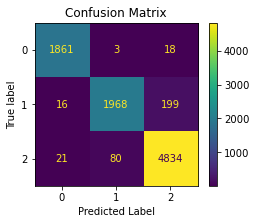

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1882
           1       0.96      0.90      0.93      2183
           2       0.96      0.98      0.97      4935

    accuracy                           0.96      9000
   macro avg       0.97      0.96      0.96      9000
weighted avg       0.96      0.96      0.96      9000

2) Test Data:


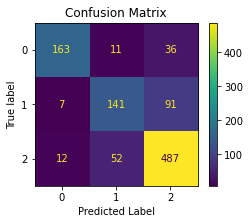

              precision    recall  f1-score   support

           0       0.90      0.78      0.83       210
           1       0.69      0.59      0.64       239
           2       0.79      0.88      0.84       551

    accuracy                           0.79      1000
   macro avg       0.79      0.75      0.77      1000
weighted avg       0.79      0.79      0.79      1000

3) Independent Test Data:


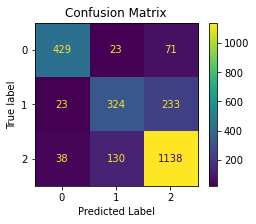

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       523
           1       0.68      0.56      0.61       580
           2       0.79      0.87      0.83      1306

    accuracy                           0.78      2409
   macro avg       0.78      0.75      0.76      2409
weighted avg       0.78      0.78      0.78      2409

Accuracy Scores for Logistic Regression-
1) Training Data        : 96.25555555555556
2) Test Data            : 79.10000000000001
3) Independent Test Data: 78.49730178497302

F1 Scores for Logistic Regression-
1) Training Data        : 96.22582760429707
2) Test Data            : 78.74471896785337
3) Independent Test Data: 78.05012297956789


************************** Logistic Regression on train_8.csv & d_8.csv **************************
TF-IDF Vectorization-
Train data dimensions: (9000, 19361)

The Report for Logistic Regression Model is:- 

1) Training Data:


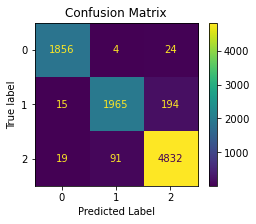

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1884
           1       0.95      0.90      0.93      2174
           2       0.96      0.98      0.97      4942

    accuracy                           0.96      9000
   macro avg       0.96      0.96      0.96      9000
weighted avg       0.96      0.96      0.96      9000

2) Test Data:


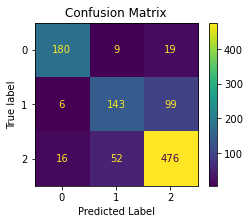

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       208
           1       0.70      0.58      0.63       248
           2       0.80      0.88      0.84       544

    accuracy                           0.80      1000
   macro avg       0.80      0.77      0.78      1000
weighted avg       0.80      0.80      0.79      1000

3) Independent Test Data:


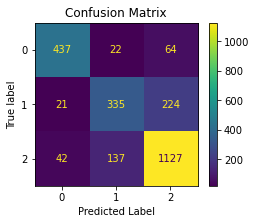

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       523
           1       0.68      0.58      0.62       580
           2       0.80      0.86      0.83      1306

    accuracy                           0.79      2409
   macro avg       0.78      0.76      0.77      2409
weighted avg       0.78      0.79      0.78      2409

Accuracy Scores for Logistic Regression-
1) Training Data        : 96.14444444444445
2) Test Data            : 79.9
3) Independent Test Data: 78.8293897882939

F1 Scores for Logistic Regression-
1) Training Data        : 96.11921465364563
2) Test Data            : 79.46406163167345
3) Independent Test Data: 78.4767002129193


************************** Logistic Regression on train_9.csv & d_9.csv **************************
TF-IDF Vectorization-
Train data dimensions: (9000, 19373)

The Report for Logistic Regression Model is:- 

1) Training Data:


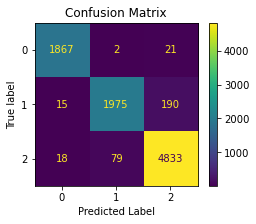

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1890
           1       0.96      0.91      0.93      2180
           2       0.96      0.98      0.97      4930

    accuracy                           0.96      9000
   macro avg       0.97      0.96      0.96      9000
weighted avg       0.96      0.96      0.96      9000

2) Test Data:


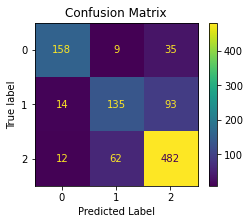

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       202
           1       0.66      0.56      0.60       242
           2       0.79      0.87      0.83       556

    accuracy                           0.78      1000
   macro avg       0.77      0.74      0.75      1000
weighted avg       0.77      0.78      0.77      1000

3) Independent Test Data:


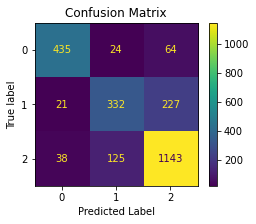

              precision    recall  f1-score   support

           0       0.88      0.83      0.86       523
           1       0.69      0.57      0.63       580
           2       0.80      0.88      0.83      1306

    accuracy                           0.79      2409
   macro avg       0.79      0.76      0.77      2409
weighted avg       0.79      0.79      0.79      2409

Accuracy Scores for Logistic Regression-
1) Training Data        : 96.38888888888889
2) Test Data            : 77.5
3) Independent Test Data: 79.28601079286011

F1 Scores for Logistic Regression-
1) Training Data        : 96.36275589483662
2) Test Data            : 77.08936199505354
3) Independent Test Data: 78.8703541591105


************************** Logistic Regression on train_10.csv & d_10.csv **************************
TF-IDF Vectorization-
Train data dimensions: (9000, 19355)

The Report for Logistic Regression Model is:- 

1) Training Data:


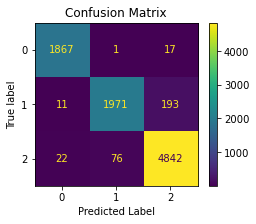

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1885
           1       0.96      0.91      0.93      2175
           2       0.96      0.98      0.97      4940

    accuracy                           0.96      9000
   macro avg       0.97      0.96      0.96      9000
weighted avg       0.96      0.96      0.96      9000

2) Test Data:


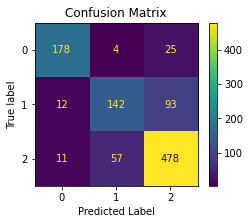

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       207
           1       0.70      0.57      0.63       247
           2       0.80      0.88      0.84       546

    accuracy                           0.80      1000
   macro avg       0.80      0.77      0.78      1000
weighted avg       0.79      0.80      0.79      1000

3) Independent Test Data:


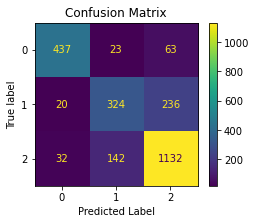

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       523
           1       0.66      0.56      0.61       580
           2       0.79      0.87      0.83      1306

    accuracy                           0.79      2409
   macro avg       0.78      0.75      0.77      2409
weighted avg       0.78      0.79      0.78      2409

Accuracy Scores for Logistic Regression-
1) Training Data        : 96.44444444444444
2) Test Data            : 79.80000000000001
3) Independent Test Data: 78.58032378580324

F1 Scores for Logistic Regression-
1) Training Data        : 96.41779915544373
2) Test Data            : 79.35738953561575
3) Independent Test Data: 78.18861745457434



Training Data                                         Testing Data  \
                    GO        UA        UC  Total F1  Accuracy           GO   
Split 1       0.984648  0.929160  0.968014  0.962066  0.962333     0.840796   
Split 2       0.984119  0.929551  0.967974  0.962041  0.962333     0.861386   
Split 3       0.984119  0.927174  0.967031  0.960919  0.961222     0.874396   
Split 4       0.985960  0.923478  0.966014  0.959875  0.960222     0.840580   
Split 5       0.984664  0.927234  0.967497  0.961376  0.961667     0.881356   
Split 6       0.982727  0.928588  0.966780  0.960842  0.961111     0.888361   
Split 7       0.984656  0.929617  0.968155  0.962258  0.962556     0.831633   
Split 8       0.983572  0.928200  0.967174  0.961192  0.961444     0.878049   
Split 9       0.985224  0.932483  0.969120  0.963628  0.963889     0.818653   
Split 10      0.986526  0.933460  0.969175  0.964178  0.964444     0.872549   

                                                Independent Test Data  \
                UA        UC  Total F1 Accuracy                    GO   
Split 1   0.676660  0.848806  0.805973    0.807              0.859941   
Split 2   0.662222  0.842932  0.803238    0.806              0.854065   
Split 3   0.674107  0.857645  0.818031    0.820              0.853778   
Split 4   0.685106  0.835125  0.800122    0.801              0.859100   
Split 5   0.632517  0.831283  0.791858    0.797              0.858801   
Split 6   0.651054  0.864583  0.818662    0.824              0.860511   
Split 7   0.636569  0.836052  0.787447    0.791              0.846989   
Split 8   0.632743  0.836555  0.794641    0.799              0.854350   
Split 9   0.602679  0.826758  0.770894    0.775              0.855457   
Split 10  0.631111  0.837128  0.793574    0.798              0.863636   

                                                  
                UA        UC  Total F1  Accuracy  
Split 1   0.618692  0.826549  0.783754  0.787464  
Split 2   0.608696  0.828039  0.780880  0.785388  
Split 3   0.607310  0.828697  0.780840  0.784973  
Split 4   0.633829  0.829412  0.788768  0.792030  
Split 5   0.619318  0.829912  0.785480  0.789954  
Split 6   0.599624  0.827485  0.779795  0.784143  
Split 7   0.613056  0.828239  0.780501  0.784973  
Split 8   0.623836  0.828372  0.784767  0.788294  
Split 9   0.625825  0.834307  0.788704  0.792860  
Split 10  0.606174  0.827183  0.781886  0.785803

In [8]:
# Logistic Regression Iterations on all 10 dataset splits
for i in range(1, 11):
    tr = 'train_'+str(i)+'.csv'
    ts = 'd_'+str(i)+'.csv'
    print()
    print('************************** Logistic Regression on {} & {} **************************'.format(tr, ts))
    LR(tr, ts, rdf, i)
    print()
  
rdf

In [9]:
# Final Results for each of the 10 splits
rdf

Training Data                                         Testing Data  \
                    GO        UA        UC  Total F1  Accuracy           GO   
Split 1       0.984648  0.929160  0.968014  0.962066  0.962333     0.840796   
Split 2       0.984119  0.929551  0.967974  0.962041  0.962333     0.861386   
Split 3       0.984119  0.927174  0.967031  0.960919  0.961222     0.874396   
Split 4       0.985960  0.923478  0.966014  0.959875  0.960222     0.840580   
Split 5       0.984664  0.927234  0.967497  0.961376  0.961667     0.881356   
Split 6       0.982727  0.928588  0.966780  0.960842  0.961111     0.888361   
Split 7       0.984656  0.929617  0.968155  0.962258  0.962556     0.831633   
Split 8       0.983572  0.928200  0.967174  0.961192  0.961444     0.878049   
Split 9       0.985224  0.932483  0.969120  0.963628  0.963889     0.818653   
Split 10      0.986526  0.933460  0.969175  0.964178  0.964444     0.872549   

                                                Independent Test Data  \
                UA        UC  Total F1 Accuracy                    GO   
Split 1   0.676660  0.848806  0.805973    0.807              0.859941   
Split 2   0.662222  0.842932  0.803238    0.806              0.854065   
Split 3   0.674107  0.857645  0.818031    0.820              0.853778   
Split 4   0.685106  0.835125  0.800122    0.801              0.859100   
Split 5   0.632517  0.831283  0.791858    0.797              0.858801   
Split 6   0.651054  0.864583  0.818662    0.824              0.860511   
Split 7   0.636569  0.836052  0.787447    0.791              0.846989   
Split 8   0.632743  0.836555  0.794641    0.799              0.854350   
Split 9   0.602679  0.826758  0.770894    0.775              0.855457   
Split 10  0.631111  0.837128  0.793574    0.798              0.863636   

                                                  
                UA        UC  Total F1  Accuracy  
Split 1   0.618692  0.826549  0.783754  0.787464  
Split 2   0.608696  0.828039  0.780880  0.785388  
Split 3   0.607310  0.828697  0.780840  0.784973  
Split 4   0.633829  0.829412  0.788768  0.792030  
Split 5   0.619318  0.829912  0.785480  0.789954  
Split 6   0.599624  0.827485  0.779795  0.784143  
Split 7   0.613056  0.828239  0.780501  0.784973  
Split 8   0.623836  0.828372  0.784767  0.788294  
Split 9   0.625825  0.834307  0.788704  0.792860  
Split 10  0.606174  0.827183  0.781886  0.785803

### 1.1) Sensitivity Analysis

In [13]:
def LRSA(tr, ts, parameters):    
    # Import Train and Test data
    train_data = pd.read_csv(tr)
    test_data = pd.read_csv(ts)
    
    # TF-IDF Vectorizer for 'OBS(mist-free)-2' text column in Train data
    vectorizer = TfidfVectorizer(min_df= 2, sublinear_tf=True, norm='l2', ngram_range=(1, 3))
    final_features = vectorizer.fit_transform(train_data['OBS(mist-free)-2']).toarray()
    
    # Train data-
    X_train = train_data['OBS(mist-free)-2']
    y_train = train_data['Category-encoded-2']
    
    # Test data-
    X_test = test_data['OBS(mist-free)-2']
    y_test = test_data['Category-encoded-2']
    
    # Logistic Regression Pipeline
    LRPipeline = Pipeline([('vect', vectorizer),
                     ('clf', LogisticRegression(C= 1.0, class_weight= None, dual= False, fit_intercept= True,
                              intercept_scaling= 1, l1_ratio= None, multi_class= 'auto',
                              n_jobs= None, penalty= 'l2', random_state=6, solver='saga', max_iter=1000))])

    model = LRPipeline.fit(X_train, y_train)
    y_test = np.array(y_test)
    
    # Sensitivity Analysis
    gridlr_solver = GridSearchCV(LRPipeline, param_grid=parameters,cv=3, n_jobs=3, refit=True)
    gridlr_solver.fit(X_train, y_train)
    # gridlr_solver_df = pd.DataFrame(gridlr_solver.cv_results_)
    # gridlr_solver_df.head
    gridlr_solver_predictions = gridlr_solver.predict(X_test)
    print(classification_report(y_test, gridlr_solver_predictions))
    print('Best Parameter- ',gridlr_solver.best_params_)
    print()

In [14]:
# Defining Parameters values for Sensitivity Analysis
parameters = {'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
              'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'clf__C': [0.0001,0.001,0.01,0.1,1,10,100,1000],
              'clf__max_iter': [100, 200, 300, 400, 500, 600, 700, 800, 900],
             }

In [ ]:
# Sensitivity Analysis Iterations on all 10 dataset splits
for i in range(1, 11):
    tr = 'train_'+str(i)+'.csv'
    ts = 'd_'+str(i)+'.csv'
    print()
    print('************************** LR Sensitivity Analysis with {} & {} **************************'.format(tr, ts))
    LRSA(tr, ts, parameters)

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       211
           1       0.69      0.66      0.68       239
           2       0.83      0.87      0.85       550

    accuracy                           0.81      1000
    macro avg       0.80      0.78      0.79      1000
    weighted avg       0.81      0.81      0.81      1000

Best Parameter- 'clf__C': 10, 'clf__max_iter': 100, 'clf__solver': 'liblinear', 'vect__ngram_range': (1, 3)}


### 1.2) Parametric Sensitivity Analysis

In [122]:
def LRSAF(tr, ts, rdf, cols, p):
    # Import Train and Test data
    train_data = pd.read_csv(tr)
    test_data = pd.read_csv(ts)
    
    # TF-IDF Vectorizer for 'OBS(mist-free)-2' text column in Train data
    vectorizer = TfidfVectorizer(min_df= 2, sublinear_tf=True, norm='l2', ngram_range=(1, 3))
    final_features = vectorizer.fit_transform(train_data['OBS(mist-free)-2']).toarray()
    print('TF-IDF Vectorization-')
    print('Train data dimensions:', final_features.shape)
    print()
    
    # Train data-
    X_train = train_data['OBS(mist-free)-2']
    y_train = train_data['Category-encoded-2']
    
    # Test data-
    X_test = test_data['OBS(mist-free)-2']
    y_test = test_data['Category-encoded-2']
    
    # Logistic Regression Pipeline
    for j in cols:
      if p == 'solver':
        LRPipeline = Pipeline([('vect', vectorizer),
                        ('clf', LogisticRegression(C= 10, class_weight= None, dual= False, fit_intercept= True,
                                  intercept_scaling= 1, l1_ratio= None, multi_class= 'auto',
                                  n_jobs= None, penalty= 'l2', random_state=6, solver=j, max_iter=1000))])
      elif p == 'max_iter':
        LRPipeline = Pipeline([('vect', vectorizer),
                        ('clf', LogisticRegression(C= 10, class_weight= None, dual= False, fit_intercept= True,
                                  intercept_scaling= 1, l1_ratio= None, multi_class= 'auto',
                                  n_jobs= None, penalty= 'l2', random_state=6, solver='liblinear', max_iter=j))])
        
      elif p == 'c':
        LRPipeline = Pipeline([('vect', vectorizer),
                        ('clf', LogisticRegression(C= j, class_weight= None, dual= False, fit_intercept= True,
                                  intercept_scaling= 1, l1_ratio= None, multi_class= 'auto',
                                  n_jobs= None, penalty= 'l2', random_state=6, solver='liblinear', max_iter=1000))])

      model = LRPipeline.fit(X_train, y_train)
      y_test = np.array(y_test)

      # Export Results to DataFrame
      curr = j

      rdf.loc[curr, ('Training Data', 'GO')] = f1_score(y_train, model.predict(X_train), average=None)[0]
      rdf.loc[curr, ('Training Data', 'UA')] = f1_score(y_train, model.predict(X_train), average=None)[1]
      rdf.loc[curr, ('Training Data', 'UC')] = f1_score(y_train, model.predict(X_train), average=None)[2]
      rdf.loc[curr, ('Training Data', 'Total F1')] = f1_score(y_train, model.predict(X_train), average="weighted")
      rdf.loc[curr, ('Training Data', 'Accuracy')] = accuracy_score(y_train, model.predict(X_train))

      rdf.loc[curr, ('Testing Data', 'GO')] = f1_score(y_test, model.predict(X_test), average=None)[0]
      rdf.loc[curr, ('Testing Data', 'UA')] = f1_score(y_test, model.predict(X_test), average=None)[1]
      rdf.loc[curr, ('Testing Data', 'UC')] = f1_score(y_test, model.predict(X_test), average=None)[2]
      rdf.loc[curr, ('Testing Data', 'Total F1')] = f1_score(y_test, model.predict(X_test), average="weighted")
      rdf.loc[curr, ('Testing Data', 'Accuracy')] = accuracy_score(y_test, model.predict(X_test))

      rdf.loc[curr, ('Independent Test Data', 'GO')] = f1_score(y_itest, model.predict(X_itest), average=None)[0]
      rdf.loc[curr, ('Independent Test Data', 'UA')] = f1_score(y_itest, model.predict(X_itest), average=None)[1]
      rdf.loc[curr, ('Independent Test Data', 'UC')] = f1_score(y_itest, model.predict(X_itest), average=None)[2]
      rdf.loc[curr, ('Independent Test Data', 'Total F1')] = f1_score(y_itest, model.predict(X_itest), average="weighted")
      rdf.loc[curr, ('Independent Test Data', 'Accuracy')] = accuracy_score(y_itest, model.predict(X_itest))

    return rdf

#### 1.2.1) Sensitivity Analysis - 'Solver'

In [120]:
# Final Output DataFrame for 'Solver'
outside = ['Training Data', 'Training Data', 'Training Data', 'Training Data', 'Training Data', 
           'Testing Data', 'Testing Data', 'Testing Data', 'Testing Data', 'Testing Data', 
           'Independent Test Data', 'Independent Test Data', 'Independent Test Data', 'Independent Test Data', 'Independent Test Data']
inside = ['GO', 'UA', 'UC', 'Total F1', 'Accuracy', 'GO', 'UA', 'UC', 'Total F1', 'Accuracy', 'GO', 'UA', 'UC', 'Total F1', 'Accuracy']
hier_index = list(zip(outside,inside))

cols = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

hier_index = pd.MultiIndex.from_tuples(hier_index)

rdf_solver = pd.DataFrame(np.random.randn(5, 15), index=cols,columns=hier_index)

In [121]:
# Sensitivity Analysis Iterations
tr = 'train_4.csv'
ts = 'd_4.csv'
print('************************** LR Sensitivity Analysis for "Solver" **************************'.format(tr, ts))
LRSAF(tr, ts, rdf_solver, cols, 'solver')

************************** LR Sensitivity Analysis for "Solver" **************************
TF-IDF Vectorization-
Train data dimensions: (9000, 19329)



Training Data                      ... Independent Test Data                    
                     GO        UA        UC  ...                    UC  Total F1  Accuracy
lbfgs          0.992832  0.954980  0.979690  ...              0.825959  0.785044  0.787879
liblinear      0.985960  0.923478  0.966014  ...              0.829412  0.788768  0.792030
newton-cg      0.992832  0.954980  0.979690  ...              0.825959  0.785044  0.787879
sag            0.992832  0.954980  0.979690  ...              0.825959  0.785044  0.787879
saga           0.992832  0.955001  0.979686  ...              0.825959  0.785044  0.787879

[5 rows x 15 columns]

#### 1.2.2) Sensitivity Analysis - 'max_iter'

In [116]:
# Final Output DataFrame for 'max_iter'
outside = ['Training Data', 'Training Data', 'Training Data', 'Training Data', 'Training Data', 
           'Testing Data', 'Testing Data', 'Testing Data', 'Testing Data', 'Testing Data', 
           'Independent Test Data', 'Independent Test Data', 'Independent Test Data', 'Independent Test Data', 'Independent Test Data']
inside = ['GO', 'UA', 'UC', 'Total F1', 'Accuracy', 'GO', 'UA', 'UC', 'Total F1', 'Accuracy', 'GO', 'UA', 'UC', 'Total F1', 'Accuracy']
hier_index = list(zip(outside,inside))

cols = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

hier_index = pd.MultiIndex.from_tuples(hier_index)

rdf_max_iter = pd.DataFrame(np.random.randn(10, 15), index=cols,columns=hier_index)

In [119]:
# Sensitivity Analysis Iterations
tr = 'train_4.csv'
ts = 'd_4.csv'
print('************************** LR Sensitivity Analysis for "max_iter" **************************'.format(tr, ts))
LRSAF(tr, ts, rdf_max_iter, cols, 'max_iter')

************************** LR Sensitivity Analysis for "max_iter" **************************
TF-IDF Vectorization-
Train data dimensions: (9000, 19329)



Training Data                      ... Independent Test Data                   
                GO        UA        UC  ...                    UC  Total F1 Accuracy
100        0.98596  0.923478  0.966014  ...              0.829412  0.788768  0.79203
200        0.98596  0.923478  0.966014  ...              0.829412  0.788768  0.79203
300        0.98596  0.923478  0.966014  ...              0.829412  0.788768  0.79203
400        0.98596  0.923478  0.966014  ...              0.829412  0.788768  0.79203
500        0.98596  0.923478  0.966014  ...              0.829412  0.788768  0.79203
600        0.98596  0.923478  0.966014  ...              0.829412  0.788768  0.79203
700        0.98596  0.923478  0.966014  ...              0.829412  0.788768  0.79203
800        0.98596  0.923478  0.966014  ...              0.829412  0.788768  0.79203
900        0.98596  0.923478  0.966014  ...              0.829412  0.788768  0.79203
1000       0.98596  0.923478  0.966014  ...              0.829412  0.788768  0.79203

[10 rows x 15 columns]

#### 1.2.2) Sensitivity Analysis - 'C'

In [125]:
# Final Output DataFrame for 'C'
outside = ['Training Data', 'Training Data', 'Training Data', 'Training Data', 'Training Data', 
           'Testing Data', 'Testing Data', 'Testing Data', 'Testing Data', 'Testing Data', 
           'Independent Test Data', 'Independent Test Data', 'Independent Test Data', 'Independent Test Data', 'Independent Test Data']
inside = ['GO', 'UA', 'UC', 'Total F1', 'Accuracy', 'GO', 'UA', 'UC', 'Total F1', 'Accuracy', 'GO', 'UA', 'UC', 'Total F1', 'Accuracy']
hier_index = list(zip(outside,inside))

cols = [0.0001,0.001,0.01,0.1,1,10,100,1000]

hier_index = pd.MultiIndex.from_tuples(hier_index)

rdf_C = pd.DataFrame(np.random.randn(8, 15), index=cols,columns=hier_index)

In [126]:
# Sensitivity Analysis Iterations
tr = 'train_4.csv'
ts = 'd_4.csv'
print('************************** LR Sensitivity Analysis for "max_iter" **************************'.format(tr, ts))
LRSAF(tr, ts, rdf_C, cols, 'c')

************************** LR Sensitivity Analysis for "max_iter" **************************
TF-IDF Vectorization-
Train data dimensions: (9000, 19329)



Training Data                      ... Independent Test Data                    
                     GO        UA        UC  ...                    UC  Total F1  Accuracy
0.0001         0.000000  0.000000  0.708567  ...              0.703096  0.381172  0.542134
0.0010         0.000000  0.000000  0.708567  ...              0.703096  0.381172  0.542134
0.0100         0.000000  0.000000  0.708567  ...              0.703096  0.381172  0.542134
0.1000         0.427105  0.327524  0.755601  ...              0.752675  0.591413  0.646741
1.0000         0.896552  0.731565  0.884742  ...              0.822384  0.765795  0.774595
10.0000        0.985960  0.923478  0.966014  ...              0.829412  0.788768  0.792030
100.0000       0.997604  0.971468  0.987112  ...              0.816797  0.774644  0.777501
1000.0000      0.997604  0.972596  0.987622  ...              0.805825  0.760759  0.762972

[8 rows x 15 columns]

## 2) Linear Support Vector Machines (LSVM) Model

### 4.1) Base case

In [ ]:
SVCPipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, 
           cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', 
           break_ties=False, random_state=None))])

lsvm = SVCPipeline.fit(X_train, y_train)
y_test = np.array(y_test)

<p style="font-family:Gadugi">Assessment of the DT Model:

The Report for Linear SVM Classifier Model is: 



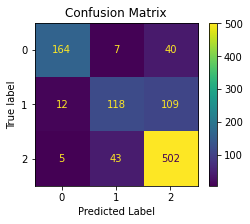

              precision    recall  f1-score   support

           0       0.91      0.78      0.84       211
           1       0.70      0.49      0.58       239
           2       0.77      0.91      0.84       550

    accuracy                           0.78      1000
   macro avg       0.79      0.73      0.75      1000
weighted avg       0.78      0.78      0.77      1000

Accuracy Score on Training data for  Decision Tree Classifier is: 79.5
Accuracy Score on Test data for  Decision Tree Classifier is: 78.4
F1 Score  for Decision Tree Classifier is: 77.49193007314813


In [ ]:
print('The Report for Linear SVM Classifier Model is: \n')
matrix = plot_confusion_matrix(lsvm, X_test, y_test, values_format='d')
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.gcf().axes[0].tick_params(color='black')
plt.gcf().set_size_inches(4,3)
plt.show()

print(classification_report(y_test, lsvm.predict(X_test)))


print("Accuracy Score on Training data for  Decision Tree Classifier is: {}".format(accuracy_score(y_train, lsvm.predict(X_train)) * 100))
print("Accuracy Score on Test data for  Decision Tree Classifier is: {}".format(accuracy_score(y_test, lsvm.predict(X_test)) * 100))
print("F1 Score  for Decision Tree Classifier is: {}".format(f1_score(y_test, lsvm.predict(X_test), average="weighted") * 100))

### Sensitivity Analysis

In [ ]:
# Defining Parameters values for Sensitivity Analysis
param_grid_solver = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
param_grid_max_iter = {'max_iter': list(range(100, 1000, 100))}
param_grid_c = {'C': list(range(-4, 4))}

In [ ]:
gridlr_solver = GridSearchCV(LogisticRegression(C= 1.0, class_weight= None, dual= False, fit_intercept= True,
                              intercept_scaling= 1, l1_ratio= None, max_iter= 100, multi_class= 'auto',
                              n_jobs= None, penalty= 'l2', random_state= None),
                      param_grid_solver, refit=True, verbose=3)

In [ ]:
gridlr_solver.fit(X_train, Y_train.values.ravel())

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] solver=newton-cg ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
gridlr_max_iter = GridSearchCV(logmodel(C= 1.0, class_weight= None, dual= False, fit_intercept= True,
                              intercept_scaling= 1, l1_ratio= None, multi_class= 'auto',
                              n_jobs= None, penalty= 'l2', random_state= None, solver: 'lbgfs'),
                      param_grid_max_iter, refit=True, verbose=3)

[-4, -3, -2, -1, 0, 1, 2, 3]


In [ ]:
gridlr_max_iter.fit(X_train, Y_train)

In [ ]:
gridlr_c = GridSearchCV(logmodel(, class_weight= None, dual= False, fit_intercept= True,
                              intercept_scaling= 1, l1_ratio= None, max_iter= 100, multi_class= 'auto',
                              n_jobs= None, penalty= 'l2', random_state= None, solver: 'lbgfs'),
                      param_grid_c, refit=True, verbose=3)

In [ ]:
gridlr_c.fit(X_train, Y_train)

### 4.2) Stop words case

In [ ]:
lsvm2 = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, 
           cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', 
           break_ties=False, random_state=None)

In [ ]:
lsvm2.fit(X_train2, Y_train)

C:\Users\Hrishikesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

<p style="font-family:Gadugi"> Prediction and Evaluation:

In [ ]:
lsvm2.score(X_train2, Y_train)

0.5391111111111111

In [ ]:
lsvm2.score(X_test2, Y_test)

0.517

In [ ]:
lsvm2_predicttr = lsvm2.predict(X_train2)

In [ ]:
lsvm2_predictts = lsvm2.predict(X_test2)

The Report for Linear SVM Classifier Model is: 



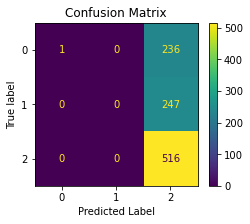

              precision    recall  f1-score   support

           0       1.00      0.00      0.01       237
           1       0.00      0.00      0.00       247
           2       0.52      1.00      0.68       516

    accuracy                           0.52      1000
   macro avg       0.51      0.33      0.23      1000
weighted avg       0.50      0.52      0.35      1000

Accuracy Score on Training data for  Decision Tree Classifier is: 53.91111111111111
Accuracy Score on Test data for  Decision Tree Classifier is: 51.7
F1 Score  for Decision Tree Classifier is: 35.348466594558616


C:\Users\Hrishikesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('The Report for Linear SVM Classifier Model is: \n')
matrix = plot_confusion_matrix(lsvm2, X_test2, Y_test, values_format='d')
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.gcf().axes[0].tick_params(color='black')
plt.gcf().set_size_inches(4,3)
plt.show()

print(classification_report(Y_test, lsvm2_predictts))


print("Accuracy Score on Training data for  Decision Tree Classifier is: {}".format(accuracy_score(Y_train, lsvm2_predicttr) * 100))
print("Accuracy Score on Test data for  Decision Tree Classifier is: {}".format(accuracy_score(Y_test, lsvm2_predictts) * 100))
print("F1 Score  for Decision Tree Classifier is: {}".format(f1_score(Y_test, lsvm2_predictts, average="weighted") * 100))

## 3) RBF Support Vector Machines (RBFSVM) Model

### 5.1) Base case

In [ ]:
rbfsvm = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, 
           cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', 
           break_ties=False, random_state=None)

In [ ]:
rbfsvm.fit(X_train, Y_train)

C:\Users\Hrishikesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

<p style="font-family:Gadugi"> Prediction and Evaluation:

In [ ]:
rbfsvm.score(X_train, Y_train)

0.5396666666666666

In [ ]:
rbfsvm.score(X_test, Y_test)

0.519

In [ ]:
rbfsvm_predicttr = rbfsvm.predict(X_train)

In [ ]:
rbfsvm_predictts = rbfsvm.predict(X_test)

<p style="font-family:Gadugi">Assessment of the DT Model:

The Report for Linear SVM Classifier Model is: 



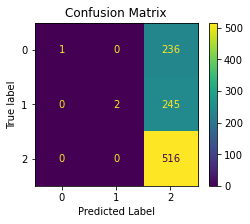

              precision    recall  f1-score   support

           0       1.00      0.00      0.01       237
           1       1.00      0.01      0.02       247
           2       0.52      1.00      0.68       516

    accuracy                           0.52      1000
   macro avg       0.84      0.34      0.24      1000
weighted avg       0.75      0.52      0.36      1000

Accuracy Score on Training data for  Decision Tree Classifier is: 53.96666666666666
Accuracy Score on Test data for  Decision Tree Classifier is: 51.9
F1 Score  for Decision Tree Classifier is: 35.79171680585054


In [ ]:
print('The Report for RBF SVM Classifier Model is: \n')
matrix = plot_confusion_matrix(rbfsvm, X_test, Y_test, values_format='d')
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.gcf().axes[0].tick_params(color='black')
plt.gcf().set_size_inches(4,3)
plt.show()

print(classification_report(Y_test, rbfsvm_predictts))


print("Accuracy Score on Training data for  Decision Tree Classifier is: {}".format(accuracy_score(Y_train, rbfsvm_predicttr) * 100))
print("Accuracy Score on Test data for  Decision Tree Classifier is: {}".format(accuracy_score(Y_test, rbfsvm_predictts) * 100))
print("F1 Score  for Decision Tree Classifier is: {}".format(f1_score(Y_test, rbfsvm_predictts, average="weighted") * 100))

### Sensitivity Analysis

In [ ]:
# Defining Parameters values for Sensitivity Analysis
param_grid_solver = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
param_grid_max_iter = {'max_iter': list(range(100, 1000, 100))}
param_grid_c = {'C': list(range(-4, 4))}

In [ ]:
gridlr_solver = GridSearchCV(LogisticRegression(C= 1.0, class_weight= None, dual= False, fit_intercept= True,
                              intercept_scaling= 1, l1_ratio= None, max_iter= 100, multi_class= 'auto',
                              n_jobs= None, penalty= 'l2', random_state= None),
                      param_grid_solver, refit=True, verbose=3)

In [ ]:
gridlr_solver.fit(X_train, Y_train.values.ravel())

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] solver=newton-cg ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
gridlr_max_iter = GridSearchCV(logmodel(C= 1.0, class_weight= None, dual= False, fit_intercept= True,
                              intercept_scaling= 1, l1_ratio= None, multi_class= 'auto',
                              n_jobs= None, penalty= 'l2', random_state= None, solver: 'lbgfs'),
                      param_grid_max_iter, refit=True, verbose=3)

[-4, -3, -2, -1, 0, 1, 2, 3]


In [ ]:
gridlr_max_iter.fit(X_train, Y_train)

In [ ]:
gridlr_c = GridSearchCV(logmodel(, class_weight= None, dual= False, fit_intercept= True,
                              intercept_scaling= 1, l1_ratio= None, max_iter= 100, multi_class= 'auto',
                              n_jobs= None, penalty= 'l2', random_state= None, solver: 'lbgfs'),
                      param_grid_c, refit=True, verbose=3)

In [ ]:
gridlr_c.fit(X_train, Y_train)

### 5.2) Stop words case

In [ ]:
rbfsvm2 = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, 
           cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', 
           break_ties=False, random_state=None)

In [ ]:
rbfsvm2.fit(X_train2, Y_train)

C:\Users\Hrishikesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


<p style="font-family:Gadugi"> Prediction and Evaluation:

In [ ]:
rbfsvm2.score(X_train2, Y_train)

In [ ]:
rbfsvm2.score(X_test2, Y_test)

In [ ]:
rbfsvm2_predicttr = rbfsvm2.predict(X_train2)

In [ ]:
rbfsvm2_predictts = rbfsvm2.predict(X_test2)

In [ ]:
print('The Report for RBF SVM Classifier Model is: \n')
matrix = plot_confusion_matrix(rbfsvm2, X_test2, Y_test, values_format='d')
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.gcf().axes[0].tick_params(color='black')
plt.gcf().set_size_inches(4,3)
plt.show()

print(classification_report(Y_test, rbfsvm2_predictts))


print("Accuracy Score on Training data for  Decision Tree Classifier is: {}".format(accuracy_score(Y_train, rbfsvm2_predicttr) * 100))
print("Accuracy Score on Test data for  Decision Tree Classifier is: {}".format(accuracy_score(Y_test, rbfsvm2_predictts) * 100))
print("F1 Score  for Decision Tree Classifier is: {}".format(f1_score(Y_test, rbfsvm2_predictts, average="weighted") * 100))

In [23]:
# Import Train and Test data
train_data = pd.read_csv('train_4.csv')
test_data = pd.read_csv('d_4.csv')

# TF-IDF Vectorizer for 'OBS(mist-free)-2' text column in Train data
vectorizer = TfidfVectorizer(min_df= 2, sublinear_tf=True, norm='l2', ngram_range=(1, 3))
final_features = vectorizer.fit_transform(train_data['OBS(mist-free)-2']).toarray()

# Train data-
X_train = train_data['OBS(mist-free)-2']
y_train = train_data['Category-encoded-2']

# Test data-
X_test = test_data['OBS(mist-free)-2']
y_test = test_data['Category-encoded-2']

# Logistic Regression Pipeline
LRPipeline = Pipeline([('vect', vectorizer),
                 ('clf', LogisticRegression(C= 10, class_weight= None, dual= False, fit_intercept= True,
                          intercept_scaling= 1, l1_ratio= None, multi_class= 'auto',
                          n_jobs= None, penalty= 'l2', random_state=6, solver='liblinear', max_iter=1000))])

model = LRPipeline.fit(X_train, y_train)

# Saving model to disk
# Pickle serializes objects so they can be saved to a file, and loaded in a program again later on.
pickle.dump(model, open('model.pkl','wb'))

In [25]:
app = Flask(__name__)
# read our pickle file and label our logisticmodel as model
model = pickle.load(open('model.pkl', 'rb'))

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict',methods=['POST','GET'])
def predict():

    vectorizer = TfidfVectorizer(min_df= 2, sublinear_tf=True, norm='l2', ngram_range=(1, 3))
    final_features = vectorizer.fit_transform(request.form.values()).toarray()
    
#     int_features = [float(x) for x in request.form.values()]
#     final_features = [np.array(int_features)]
    prediction = model.predict(final_features)

    
    if prediction=='GO':
        return render_template('index.html',
                               prediction_text='{}: This is a Good Observation!'.format(prediction),
                               )
    elif prediction=='UA':
        return render_template('index.html',
                               prediction_text='{}: This is an Unsafe Act !!'.format(prediction),
                               )
    else:
        return render_template('index.html',
                               prediction_text='{}: This is an Unsafe Condition !!'.format(prediction),
                              )